In [1]:
# Source: https://www.geeksforgeeks.org/python-gender-identification-by-name-using-nltk/
# importing libraries
import random
from nltk.corpus import names
import nltk
import pandas as pd

## Book Depository

In [41]:
# Import Bookdepository CSV
#authors = pd.read_csv("/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Bookdepository/NaturalHistory-Bookdepository-2021.csv", dtype=str)
authors = pd.read_csv("/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Bookdepository/NaturalHistory-Bookdepository-All.csv", dtype=str)

authors.head(5)

,Unnamed: 0,authors,titles,date,year
0,0,Stephen Hawking,A Brief History Of Time,20 Jan 2015,2015
1,1,James Bowen,A Street Cat Named Bob,23 Jan 2013,2013
2,2,Peter Wohlleben,The Hidden Life of Trees,22 Nov 2019,2019
3,3,Raynor Winn,The Salt Path,31 Jan 2019,2019
4,4,Catherine D. Hughes,Little Kids First Big Book of Dinosaurs,16 Aug 2018,2018


In [44]:
# Create a colum for first names
authors["FirstName"] = ""

authors['FirstName'] = authors['authors'].str.split(" ")#1, expand=True
#authors['FirstName'][1][0] # 'Jeremy'

# Create an empty column for gender
authors["Gender"] = ""

# Drop unnecessary columns
authors.drop('Unnamed: 0', axis=1, inplace=True)

authors.head(5)

,authors,titles,date,year,FirstName,Gender
0,Stephen Hawking,A Brief History Of Time,20 Jan 2015,2015,"[Stephen, Hawking]",
1,James Bowen,A Street Cat Named Bob,23 Jan 2013,2013,"[James, Bowen]",
2,Peter Wohlleben,The Hidden Life of Trees,22 Nov 2019,2019,"[Peter, Wohlleben]",
3,Raynor Winn,The Salt Path,31 Jan 2019,2019,"[Raynor, Winn]",
4,Catherine D. Hughes,Little Kids First Big Book of Dinosaurs,16 Aug 2018,2018,"[Catherine, D., Hughes]",


## NLTK Prediction

In [45]:
def gender_features(word):
    return {'last_letter':word[-1]}
  
# preparing a list of examples and corresponding class labels.
labeled_names = ([(name, 'Female') for name in names.words('/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Names/Dataset2/Female.txt')]+
             [(name, 'Male') for name in names.words('/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Names/Dataset2/Male.txt')])
  
random.shuffle(labeled_names)

# we use the feature extractor to process the names data.
featuresets = [(gender_features(n), gender) 
               for (n, gender)in labeled_names]
  
# Divide the resulting list of feature
# sets into a training set and a test set.
train_set, test_set = featuresets[500:], featuresets[:500]
  
# The training set is used to 
# train a new "naive Bayes" classifier.
classifier = nltk.NaiveBayesClassifier.train(train_set) # 76% accuracy

print(nltk.classify.accuracy(classifier, train_set)) # Accuract is 0.7461467177257799

0.7460922062170375


In [46]:
for i in range(len(authors)): #iterate over rows
    
    # Get the name
    name = authors['FirstName'][i][0]
    
    
    # If the authors' name is in our name dataset check gender
    if name in open('/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Names/Dataset2/AllNames.txt').read():
        gender = classifier.classify(gender_features(name))
        authors["Gender"][i] = str(gender)
        #print(gender)

    # If the name is empty print unknown
    elif name == 0:
        authors["Gender"][i] = "Unknown"
        #print("Empty")
        
    # If the name is not in the database print unknown
    else:
        authors["Gender"][i] = "Unknown"
        #print('Unknown')
print('Done')

Done


In [47]:
authors.head(5)

,authors,titles,date,year,FirstName,Gender
0,Stephen Hawking,A Brief History Of Time,20 Jan 2015,2015,"[Stephen, Hawking]",Male
1,James Bowen,A Street Cat Named Bob,23 Jan 2013,2013,"[James, Bowen]",Male
2,Peter Wohlleben,The Hidden Life of Trees,22 Nov 2019,2019,"[Peter, Wohlleben]",Male
3,Raynor Winn,The Salt Path,31 Jan 2019,2019,"[Raynor, Winn]",Male
4,Catherine D. Hughes,Little Kids First Big Book of Dinosaurs,16 Aug 2018,2018,"[Catherine, D., Hughes]",Female


## Save the Result

In [48]:
authors.to_csv('/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Bookdepository/NaturalHistory-All-Gender.csv')


## Create Stat & Plot

In [32]:
f = authors['Gender'].value_counts()['Female'] # All: 3465
m = authors['Gender'].value_counts()['Male'] # All: 5836
u = authors['Gender'].value_counts()['Unknown'] # All: 659

stat = pd.DataFrame({
    'Female': [f],
    'Male': [m]
    #'Unknown': [u]
})
stat

,Female,Male
0,3465,5836


/Users/nat/opt/anaconda3/envs/finalspace/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


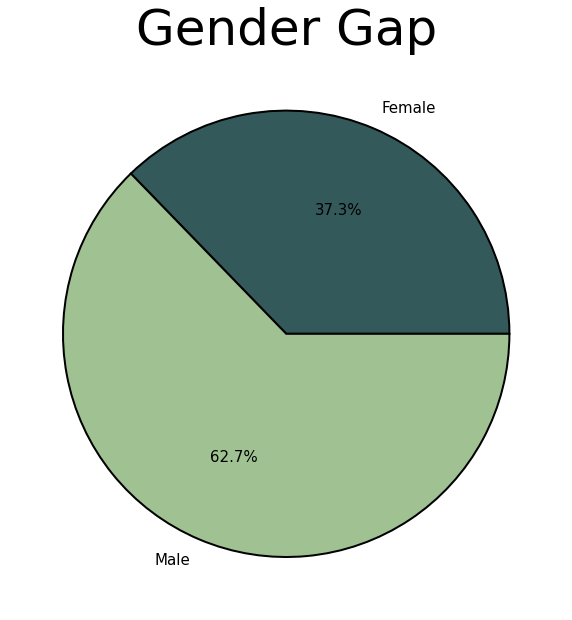

In [33]:
from matplotlib import pyplot as plt

mylabels = ["Female", "Male"]
mycolors = ["#34595a", "#a0c293"]

#controls default text size
plt.rc('font', size=15)

# plot size
#plt.rcParams["figure.figsize"] = [10, 15]

#set title font to size 50
plt.rc('axes', titlesize=50) 

plt.pie(stat, 
        labels = mylabels, 
        autopct ='%1.1f%%',
        colors = mycolors,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
#plt.legend(loc='upper left')
plt.title('Gender Gap')

# Save figure
plt.savefig('/Users/nat/Desktop/gender-gap-All.png', dpi = 100)

# Display the graph onto the screen
plt.show() 

## Yearly 

In [89]:
# Filter data
df_2021 = authors[(authors['year'] == '2021')]
df_2020 = authors[(authors['year'] == '2020')]
df_2019 = authors[(authors['year'] == '2019')]
df_2018 = authors[(authors['year'] == '2018')]
df_2017 = authors[(authors['year'] == '2017')]
df_2016 = authors[(authors['year'] == '2016')]
df_2015 = authors[(authors['year'] == '2015')]

df_2010 = authors[(authors['year'] == '2010')]
df_2005 = authors[(authors['year'] == '2005')]
df_2000 = authors[(authors['year'] == '2000')]
df_1995 = authors[(authors['year'] == '1995')]
df_1990 = authors[(authors['year'] == '1990')]

In [90]:
f1 = df_2021['Gender'].value_counts()['Female'] 
m1 = df_2021['Gender'].value_counts()['Male'] 
u1 = df_2021['Gender'].value_counts()['Unknown'] 

f2 = df_2020['Gender'].value_counts()['Female'] 
m2 = df_2020['Gender'].value_counts()['Male'] 
u2 = df_2020['Gender'].value_counts()['Unknown'] 

f3 = df_2019['Gender'].value_counts()['Female'] 
m3 = df_2019['Gender'].value_counts()['Male'] 
u3 = df_2019['Gender'].value_counts()['Unknown'] 

f4 = df_2018['Gender'].value_counts()['Female'] 
m4 = df_2018['Gender'].value_counts()['Male'] 
u4 = df_2018['Gender'].value_counts()['Unknown']

f5 = df_2017['Gender'].value_counts()['Female'] 
m5 = df_2017['Gender'].value_counts()['Male'] 
u5 = df_2017['Gender'].value_counts()['Unknown']

f6 = df_2016['Gender'].value_counts()['Female'] 
m6 = df_2016['Gender'].value_counts()['Male'] 
u6 = df_2016['Gender'].value_counts()['Unknown']

f7 = df_2015['Gender'].value_counts()['Female'] 
m7 = df_2015['Gender'].value_counts()['Male'] 
u7 = df_2015['Gender'].value_counts()['Unknown']

f8 = df_2010['Gender'].value_counts()['Female'] 
m8 = df_2010['Gender'].value_counts()['Male'] 
u8 = df_2010['Gender'].value_counts()['Unknown']

f9 = df_2005['Gender'].value_counts()['Female'] 
m9 = df_2005['Gender'].value_counts()['Male'] 
u9 = df_2005['Gender'].value_counts()['Unknown']

f10 = df_2000['Gender'].value_counts()['Female'] 
m10 = df_2000['Gender'].value_counts()['Male'] 
u10 = df_2000['Gender'].value_counts()['Unknown']

f11 = df_1995['Gender'].value_counts()['Female'] 
m11 = df_1995['Gender'].value_counts()['Male'] 
u11 = df_1995['Gender'].value_counts()['Unknown']

In [92]:
#yearly_stat = pd.DataFrame(names, columns=['Name'])

last_5 = pd.DataFrame({
    'Year': [2021, 2020, 2019, 2018, 2017],
    'Female': [f1, f2, f3, f4, f5],
    'Male': [m1, m2, m3, m4, m5]
    #'Unknown': [u]
})
last_5

,Year,Female,Male
0,2021,382,533
1,2020,358,465
2,2019,281,401
3,2018,267,432
4,2017,235,399


In [96]:
every_5 = pd.DataFrame({
    'Year': [2020, 2015, 2010, 2005, 2000, 1995],
    'Female': [f2, f7, f8, f9, f10, f11],
    'Male': [m2, m7, m8, m9, m10, m11]
    #'Unknown': [u]
})
every_5

,Year,Female,Male
0,2020,358,465
1,2015,263,383
2,2010,107,225
3,2005,57,100
4,2000,31,59
5,1995,12,19


In [121]:
import plotly.graph_objects as go

# labels={'trace 0': "hello", 'trace 1': "hi"}

# set up plotly figure
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x=every_5['Year'],
    y=every_5['Female'],
    hovertext=every_5['Female'],
    hoverinfo="text",
    marker=dict(
        color="black"
    ),
    showlegend=True,
    line_width=3
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x=every_5['Year'],
    y=every_5['Male'],
    hovertext=every_5['Male'],
    hoverinfo="text",
    marker=dict(
        color="green"
    ),
    showlegend=True,
    line_width=3
))

# Source: https://www.geeksforgeeks.org/plotly-how-to-show-legend-in-single-trace-scatterplot-with-plotly-express/
fig['data'][0]['showlegend'] = True
fig['data'][0]['name'] = 'Female'
fig['data'][1]['name'] = 'Male'

fig.show()

In [125]:
# importing package
#import matplotlib.pyplot as plt

  
# plot lines
#plt.plot(every_5['Year'], every_5['Female'], label = "F")
#plt.plot(every_5['Year'], every_5['Male'], label = "M")

# plot size
#plt.rcParams["figure.figsize"] = [3, 5]
#plt.legend()
#plt.show()